In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

##### Import the generated csv files as pandas dataframes

In [3]:
overview_df = pd.read_csv("../csv/overview_df.csv", index_col=0)
detailed_df = pd.read_csv("../csv/detailed_df.csv", index_col=[0,1])

overview_burma = overview_df[overview_df["distance_matrix_names"].str.contains("burma")]
overview_brazil = overview_df[overview_df["distance_matrix_names"].str.contains("brazil")]
display(overview_burma)

,distance_matrix_names,crossover_functions,mutation_functions,replacement_functions,mutation_rates,crossover_rates,tournament_rates,population_sizes,LowestCost,HighestCost,AvgCost
0,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,25,3816.2,3816.2,3816.2000
1,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,100,3573.3,3573.3,3573.3000
2,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.05,500,3452.5,3452.5,3452.5000
3,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.15,25,3666.2,3666.2,3666.2000
4,../xml/burma14.xml,PmxCrossover,SwapMutation,ReplaceWeakest,0.15,0.3,0.15,100,3501.7,3501.7,3501.7000
...,...,...,...,...,...,...,...,...,...,...,...
643,../xml/burma14.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.15,100,3583.8,4134.9,3845.6010
644,../xml/burma14.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.15,500,3478.7,8587.0,5792.2512
645,../xml/burma14.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.50,25,3546.5,3752.4,3656.7040
646,../xml/burma14.xml,CrossoverWithFix,InsertMutation,ReplaceFirstWeakest,0.50,0.8,0.50,100,3476.6,4391.3,3868.8760


## Analyse Burma

##### Get best and worst cost for Burma

In [4]:
best_lowest_cost_burma = overview_burma["LowestCost"].min()
worst_lowest_cost_burma = overview_burma["LowestCost"].max()
print("Best lowest cost Burma: ",best_lowest_cost_burma)
print("Worst lowest cost Burma: ",worst_lowest_cost_burma)

Best lowest cost Burma:  3323.0
Worst lowest cost Burma:  3978.8


Notes: Don't take just the best solutions but the top x percent. Then one might find where the best solutions originate from. Example: best solution in brazil was with population size 25. But maybe close by there is a value that has population size 100.

##### Show histogram of burma best costs

648


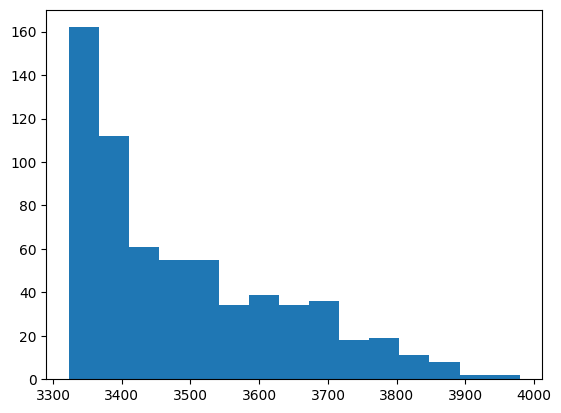

In [5]:
print(overview_burma["LowestCost"].size)
plt.hist(overview_burma["LowestCost"], bins = 15)
plt.show()

##### Tables
There are 7 parameters that were changed during the experiments. Namely:

    - crossover_functions
    - mutation_functions
    - replacement_functions
    - mutation_rates
    - crossover_rates
    - tournament_rates
    - population_sizes

The aim of this section is to identify how changing a single parameter affects the average performance of the runs within the experiments.
The results will then be put in a table were the row indicates the varied parameter and the column indicates it's value. Because different parameters have different values, a columns value depends on the parameter that is considered at the moment. If the change in performance related to the choice of a particular value for a parameter is independent from other parameters chosen, this would mean that one acquires the best solution by combining parameters according to the columns that yield the best performance.

In [6]:
#get values for each parameter
parameter_dict = {
                "crossover_functions" : overview_burma["crossover_functions"].unique(),
                "mutation_functions" : overview_burma["mutation_functions"].unique(),
                "replacement_functions" : overview_burma["replacement_functions"].unique(),
                "mutation_rates" : overview_burma["mutation_rates"].unique(),
                "crossover_rates" : overview_burma["crossover_rates"].unique(),
                "tournament_rates" : overview_burma["tournament_rates"].unique(),
                "population_sizes" : overview_burma["population_sizes"].unique()
                }
#parameter_dict_column_labels = 
#parameter_row_labels = 

In [7]:
cost_dict = {}
for key,values in parameter_dict.items():
    average_costs = []
    for value in values:
        average_costs.append(overview_burma["LowestCost"][overview_burma[key] == value].mean())
    cost_dict[key] = average_costs

print(cost_dict)


{'crossover_functions': [3486.4370370370366, 3476.128703703704, 3501.9824074074077], 'mutation_functions': [3527.603703703703, 3351.0583333333334, 3585.8861111111105], 'replacement_functions': [3555.4783950617284, 3420.887037037037], 'mutation_rates': [3498.6694444444447, 3477.69598765432], 'crossover_rates': [3493.733950617284, 3482.631481481481], 'tournament_rates': [3448.343055555556, 3488.7199074074074, 3527.4851851851854], 'population_sizes': [3512.7472222222223, 3488.734259259259, 3463.066666666666]}


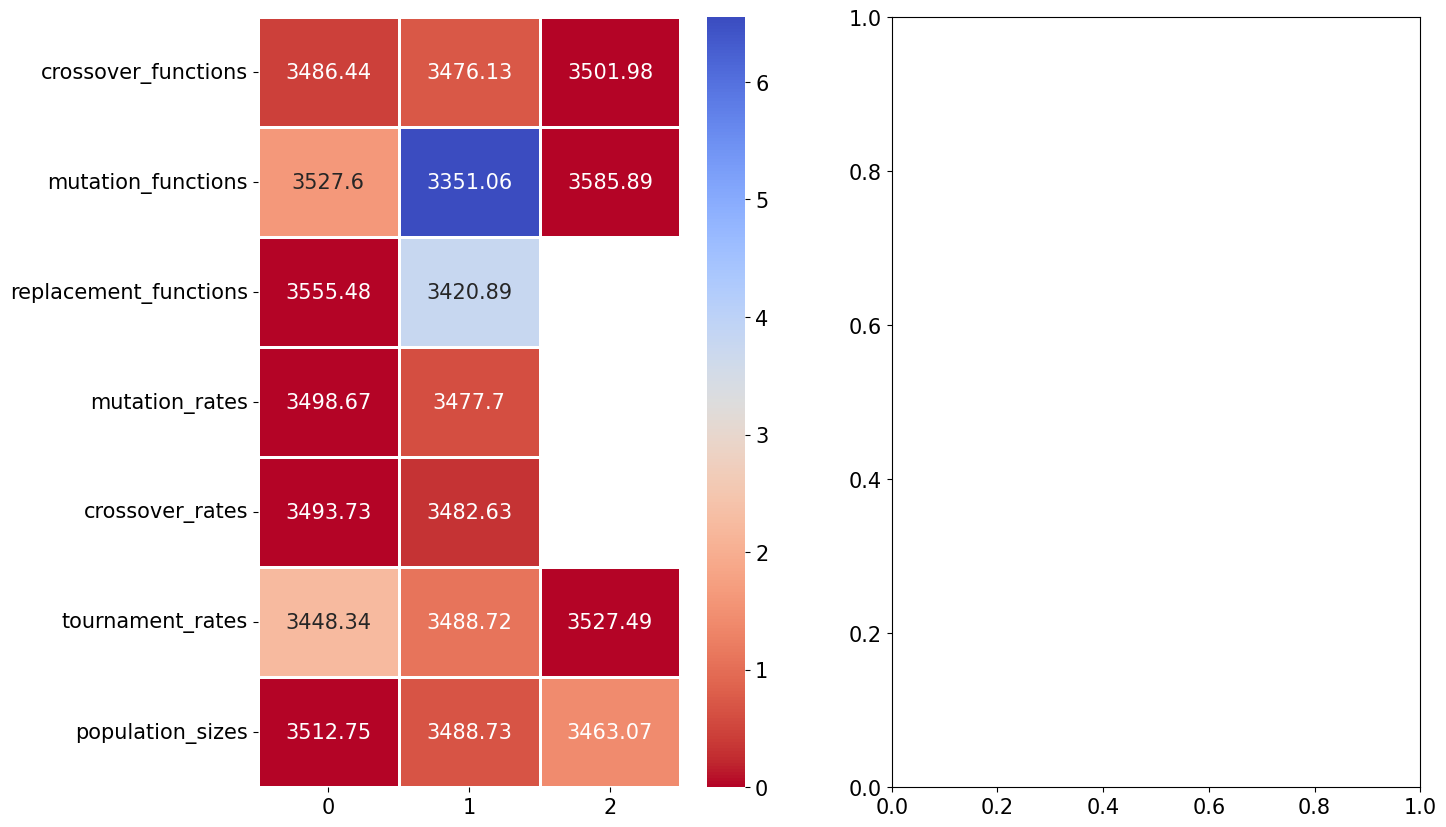

In [34]:
values = list(cost_dict.values())
max_length = max([len(x) for x in values])
padded_values = np.zeros(shape=(len(values),max_length))
for row in range(len(values)):
    for column in range(len(values[row])):
        padded_values[row,column] = values[row][column]

padded_values[padded_values == 0] = np.NaN
df = pd.DataFrame(padded_values, index=list(cost_dict.keys()))
normalized = (1 - df.div(df.max(axis=1), axis=0))*100
_, ax = plt.subplots(ncols=2)
sns.heatmap(normalized, cmap="coolwarm_r", annot=df, fmt="g", linewidths=1, annot_kws={'size': 15}, ax= ax[0])
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 15})
plt.show()

The colorbar shows how much better the value of the current cell is compared to the worst one of the corresponding row. Numbers are given in percent